<a href="https://colab.research.google.com/github/jmikedupont2/astdf/blob/main/merging_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def append_typename(f,v): 
    tn = type(v).__name__ 
    return f + "_"+ tn

        

In [1]:
import psutil
psutil.Process().memory_info().rss / (1024 * 1024)

91.0859375

In [4]:
import pandas
import tensorflow as tf
import keras
import sklearn
import matplotlib.pyplot as plt
import ast
import inspect
import types
import json
from contextlib import suppress
from _ast import AST
from ast import parse
import codecs
import pandas as pd
#import asttokens
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import (OneHotEncoder,LabelBinarizer)
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
psutil.Process().memory_info().rss / (1024 * 1024)

532.8125

In [5]:
# First we iterate over all the modules that are not built in
# and find the globals that are modules and for each of those we parse the ast of the module.

parsed_modules_asts ={
    x : ast.parse(inspect.getsource(y))
    for x,y in globals().items()
    if isinstance(y, types.ModuleType)
    and x not in  ('__builtins__',
                   '__builtin__',
                  )
         
}
psutil.Process().memory_info().rss / (1024 * 1024)

542.109375

In [7]:
all_asts = []
module_asts={}

for module in parsed_modules_asts:
    module_asts[module]=[]
    class DFVisitorLocal(ast.NodeVisitor):
        def generic_visit(self, node):
            all_asts.append(node)
            if module not in module_asts:
                module_asts[module]={}
            module_asts[module].append(node)
            ast.NodeVisitor.generic_visit(self, node)
    v = DFVisitorLocal()
    for y in parsed_modules_asts[module].body:
        v.visit(y)              
psutil.Process().memory_info().rss / (1024 * 1024)   

543.76171875

In [8]:
def simple(v):    
    if isinstance(v, AST):
        names=[]
        names.append(type(v).__name__)
        for f,v in ast.iter_fields(v):            
            f = append_typename(f,v)            
            names.append(f)
        return ",".join(names)           
    elif isinstance(v, list):
        return "LIST"+".".join(list(set([str(type(v1)) for v1 in v])))
    else:
        return str(v)

In [9]:
mobjects=[]
for y in all_asts:
    object = {
                  append_typename(f,v):simple(v) for f,v in ast.iter_fields(y)
            }
    object['nodetype']=simple(y)
    mobjects.append(object)
df = pd.DataFrame(mobjects)
df
psutil.Process().memory_info().rss / (1024 * 1024)

674.59765625

In [11]:
# columne encoders
# we add the label binarizer
#'<' not supported between instances of 'float' and 'str' targets
#'<' not supported between instances of 'float' and 'str' value
#'<' not supported between instances of 'float' and 'str' type_comment

#for col in ("value_Constant","targets_list","type_comment_NoneType","id_str"):
#    df[col] = df[col].astype(str)

colencoders={}
for c in df.columns:
    print("Processing: " + c + " " + str(psutil.Process().memory_info().rss / (1024 * 1024)))
    #print(df[c].unique())
    df[c] = df[c].astype(str)
    #le = sklearn.preprocessing.LabelEncoder()
    be = sklearn.preprocessing.LabelBinarizer(
        #sparse_output=True
        )
    #b = le.fit_transform(df[c])
    
    b2 = be.fit_transform(df[c])
    
    #b.hist()
    colencoders[c]={ 
        #"b":b,
        "b2":b2,
        #"le":le,
        "be":be,
    }
psutil.Process().memory_info().rss / (1024 * 1024)

Processing: value_Str 2409.11328125
Processing: nodetype 2410.12890625
Processing: s_str 2410.12890625
Processing: module_str 2410.26953125
Processing: names_list 2410.26953125
Processing: level_int 2410.26953125
Processing: name_str 2410.26953125
Processing: asname_NoneType 2410.26953125
Processing: body_list 2410.26953125
Processing: handlers_list 2410.26953125
Processing: orelse_list 2410.26953125
Processing: finalbody_list 2410.26953125
Processing: type_Name 2410.26953125
Processing: name_NoneType 2410.26953125
Processing: id_str 2410.26953125
Processing: ctx_Load 2410.30859375
Processing: targets_list 2410.30859375
Processing: value_NameConstant 2410.30859375
Processing: ctx_Store 2410.30859375
Processing: value_NoneType 2410.30859375
Processing: module_NoneType 2410.30859375
Processing: asname_str 2410.30859375
Processing: test_Name 2410.30859375
Processing: test_Attribute 2410.30859375
Processing: value_Name 2410.30859375
Processing: attr_str 2410.30859375
Processing: value_Attr

2990.1640625

2.8gb ram used 
37 gb disk

In [14]:
encoded_data ={
        c: colencoders[c]['be'].transform(df[c])
        for c in df.columns
        }
        # 7gb
psutil.Process().memory_info().rss / (1024 * 1024)

4862.2578125

In [42]:
col_width_df = pd.DataFrame({ k : encoded_data[k].shape[1] for k in encoded_data if encoded_data[k].shape[1] > 2},index=[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda555282d0>]],
      dtype=object)

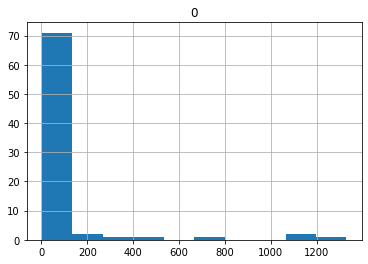

In [43]:
# there are a bunch of columes with very little data, lets exclude them
col_width_df.transpose().hist()

In [48]:
[x for x in col_width_df.transpose().groupby([0])]

[(3,                     0
  names_list          3
  level_int           3
  handlers_list       3
  value_NameConstant  3
  test_Attribute      3
  keywords_list       3
  elt_Call            3
  iter_Call           3
  left_Call           3
  right_Call          3
  test_Call           3
  kwonlyargs_list     3
  operand_Call        3
  right_Num           3
  left_Num            3
  value_bool          3
  test_BoolOp         3
  value_BoolOp        3
  value_Num           3
  iter_Attribute      3
  body_Call           3
  body_Subscript      3
  test_Subscript      3
  conversion_int      3
  operand_Attribute   3
  test_BinOp          3
  lower_BinOp         3), (4,                  0
  finalbody_list   4
  right_Attribute  4
  value_Call       4
  bases_list       4
  value_Compare    4
  operand_Compare  4
  right_BinOp      4
  value_ListComp   4
  value_Lambda     4
  upper_BinOp      4), (5,                      0
  targets_list         5
  value_Attribute      5
  ifs_list 

We see above that there is an id_str,
``` 
(469,            0 arg_str  469), 
(702,            0 attr_str  702), 
(1087,           0 s_str  1087), 
(1119,           0 name_str  1119), 
(1329,           0 id_str  1329)
```

I wonder if there are common values between those string fields,
lets retrain it on a single colencoder by type str.

but for now I want those high cardinality items and to see if we can find common values. 


In [57]:
def merge_columns(names):
  be = sklearn.preprocessing.LabelBinarizer()
  stacker =[]
  for c in names:
    print("Processing: " + c + " " + str(psutil.Process().memory_info().rss / (1024 * 1024)))
    df[c] = df[c].astype(str)
    stacker.append(df[c])
  df3 = pd.concat(stacker, ignore_index=True)
  b2 = be.fit(df3)
  my_encoded_data = {
        c: be.transform(df[c])
        for c in names
  }
  width_df = pd.DataFrame({ k : my_encoded_data[k].shape[1] for k in my_encoded_data },index=[0])
  return { "ce": b2, "df" : my_encoded_data, "width": width_df}

print("MEM",psutil.Process().memory_info().rss / (1024 * 1024))
lb_id_name = merge_columns(["id_str","name_str"]) 
lb_id_name

MEM 6383.80078125
Processing: id_str 6383.80078125
Processing: name_str 6383.80078125


{'ce': LabelBinarizer(), 'df': {'id_str': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), 'name_str': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]])}, 'width':    id_str  name_str
 0    2139      2139}

In [53]:
ed_col_width_df = pd.DataFrame({ k : lb_id_name["df"][k].shape[1] for k in lb_id_name["df"] },index=[0])

In [54]:
ed_col_width_df

,id_str,name_str
0,2139,2139


In [65]:
strcols= [x for x in col_width_df.columns if x.endswith("str")]

In [ ]:
merge_columns(strcols)

Processing: s_str 9373.90625
Processing: module_str 9374.41796875
Processing: name_str 9374.41796875
Processing: id_str 9374.41796875
Processing: asname_str 9374.41796875
Processing: attr_str 9374.41796875
Processing: arg_str 9374.41796875


In [56]:
# if we add up the cardicalities we can see 309 strings that I think are overlapping. We can use this technique to create groups of attributes. lets add in another columne.

1329+1119-2139

309

In [58]:
# the thrid column (s_str) seems contained in the first two
merge_columns(["id_str","name_str","s_str"]) 
lb_id_name

Processing: id_str 7663.94140625
Processing: name_str 7663.94140625
Processing: s_str 7663.94140625


{'ce': LabelBinarizer(), 'df': {'id_str': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), 'name_str': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [1, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]])}, 'width':    id_str  name_str
 0    2139      2139}

In [15]:
newcols = []
for c in df.columns:
  ce = colencoders[c]['be'] 
  for cc in ce.classes_: 
    newcols.append(c+"_"+cc)
len(newcols)
psutil.Process().memory_info().rss / (1024 * 1024)

4862.66796875

In [ ]:
newobject=[]
for r in df.index[0:10]:
  st = []
  for c in df.columns:
    ce = colencoders[c]['be']
    attr = encoded_data[c][r]
    #dd = ce.inverse_transform(attr)
    #if dd[0] != 'nan':
    #  print(r, c, attr, dd)
    da = attr
    print(len(da), len(ce.classes_))
    st.append(da)
  st2 = np.hstack(st)
  #
  no = pd.Series(pd.arrays.SparseArray(st2[0]))
  newobject.append(no)
  #print(c, shapes)
psutil.Process().memory_info().rss / (1024 * 1024)

In [88]:
[ x.shape for x in newobject ]

[(5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,),
 (5241,)]

In [22]:

encoded_ds = pd.DataFrame(newobject,  ) 
psutil.Process().memory_info().rss / (1024 * 1024)

4876.23828125

In [23]:
dataframes=[]
df2 = pd.DataFrame(encoded_ds)
print(list(df2.columns))
for c in list(df2.columns):
    #print(c)
    dfx = pd.DataFrame(encoded_ds).drop([c],axis=1)
    dfy = pd.DataFrame(encoded_ds[c]).values.ravel()      
    #print(dfx.shape,dfy.shape)
    #print(dfx.head(),dfy[0:10]) 
    X = dfx
    Y = dfy    
    d= {
        'c': c,
        "dfx":dfx,
        "dfy":dfy,
       # "features":features,
       # "test":test,
       # 'fit': fit
    }
    #print(features)
    dataframes.append(d)
psutil.Process().memory_info().rss / (1024 * 1024)

[0]
0


4876.3828125

In [25]:
encoded_ds.head()

,0
0,0
1,1
2,0
3,1
4,1
